In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.datasets.utils import download_url
import torch.nn.functional as F

In [77]:
dataframe =pd.read_csv(r'C:\Users\User\Desktop\AI (Neural Networks)&Deep learning\exercises AI\life1.csv')
filename = 'datasets_33080_43333_car data.csv'

In [78]:
print(dataframe)

      Unnamed: 0      Country  Year      Status  Life expectancy   \
0              0  Afghanistan  2015  Developing              65.0   
1              1  Afghanistan  2014  Developing              59.9   
2              2  Afghanistan  2013  Developing              59.9   
3              3  Afghanistan  2012  Developing              59.5   
4              4  Afghanistan  2011  Developing              59.2   
...          ...          ...   ...         ...               ...   
1654        2933     Zimbabwe  2004  Developing              44.3   
1655        2934     Zimbabwe  2003  Developing              44.5   
1656        2935     Zimbabwe  2002  Developing              44.8   
1657        2936     Zimbabwe  2001  Developing              45.3   
1658        2937     Zimbabwe  2000  Developing              46.0   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0               263.0             62     0.01               71.279624   
1               271.0    

In [79]:
dataframe_raw =pd.read_csv(filename)
dataframe_raw.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [80]:
num_rows =len(dataframe)
num_rows

1659

In [81]:
num_cols =len(dataframe.columns)
num_cols

23

In [82]:
# a = dataframe.dropna()   dropping null values in the dataset and saving in valiable a
# a.to_csv('life1.csv')    creating a new dataset (life1.csv) containing value in a

In [138]:
input_cols =dataframe.columns.values.tolist()
input_cols.remove('Life expectancy ')
input_cols.remove('Unnamed: 0')


input_cols

['Country',
 'Year',
 'Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [140]:
output_cols =[dataframe.columns[4]]
output_cols

['Life expectancy ']

In [141]:
categorical_cols =dataframe.select_dtypes(include ='object').columns.tolist()
categorical_cols

['Country', 'Status']

# prepare the dataset for training

HERE WE NEED TO CONVERT THE PANDAS DATAFRAME INTO PYTORCH TENSOR FOR TRAINING.

In [142]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [143]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

(array([[0.000e+00, 2.015e+03, 1.000e+00, ..., 1.730e+01, 4.790e-01,
         1.010e+01],
        [0.000e+00, 2.014e+03, 1.000e+00, ..., 1.750e+01, 4.760e-01,
         1.000e+01],
        [0.000e+00, 2.013e+03, 1.000e+00, ..., 1.770e+01, 4.700e-01,
         9.900e+00],
        ...,
        [1.330e+02, 2.002e+03, 1.000e+00, ..., 1.300e+00, 4.270e-01,
         1.000e+01],
        [1.330e+02, 2.001e+03, 1.000e+00, ..., 1.700e+00, 4.270e-01,
         9.800e+00],
        [1.330e+02, 2.000e+03, 1.000e+00, ..., 1.120e+01, 4.340e-01,
         9.800e+00]]), array([[65. ],
        [59.9],
        [59.9],
        ...,
        [44.8],
        [45.3],
        [46. ]]))

In [144]:
inputs_array.dtype

dtype('float64')

In [145]:
inputs = torch.tensor(inputs_array, dtype=torch.float32 )
targets = torch.tensor(targets_array, dtype=torch.float32)
inputs

tensor([[0.0000e+00, 2.0150e+03, 1.0000e+00,  ..., 1.7300e+01, 4.7900e-01,
         1.0100e+01],
        [0.0000e+00, 2.0140e+03, 1.0000e+00,  ..., 1.7500e+01, 4.7600e-01,
         1.0000e+01],
        [0.0000e+00, 2.0130e+03, 1.0000e+00,  ..., 1.7700e+01, 4.7000e-01,
         9.9000e+00],
        ...,
        [1.3300e+02, 2.0020e+03, 1.0000e+00,  ..., 1.3000e+00, 4.2700e-01,
         1.0000e+01],
        [1.3300e+02, 2.0010e+03, 1.0000e+00,  ..., 1.7000e+00, 4.2700e-01,
         9.8000e+00],
        [1.3300e+02, 2.0000e+03, 1.0000e+00,  ..., 1.1200e+01, 4.3400e-01,
         9.8000e+00]])

In [146]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [147]:
dataset = TensorDataset(inputs, targets)

In [148]:
val_percent = 0.14 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_ds, val_ds = random_split(dataset, [1000,659]) # Use the random_split function to split dataset into 2 parts of the desired length

In [149]:
batch_size = 10

In [150]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [151]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[4.2000e+01, 2.0130e+03, 1.0000e+00, 1.9200e+02, 0.0000e+00, 1.0000e-02,
         4.6065e+02, 9.9000e+01, 0.0000e+00, 6.1100e+01, 0.0000e+00, 9.9000e+01,
         4.2600e+00, 9.9000e+01, 1.0000e-01, 4.7637e+03, 8.7972e+05, 4.0000e+00,
         3.7000e+00, 7.1900e-01, 1.5000e+01],
        [1.8000e+01, 2.0020e+03, 0.0000e+00, 1.5700e+02, 1.0000e+00, 1.0200e+01,
         3.3268e+01, 8.8000e+01, 0.0000e+00, 5.8100e+01, 1.0000e+00, 9.4000e+01,
         7.4100e+00, 9.3000e+01, 1.0000e-01, 2.8753e+02, 7.8372e+06, 2.4000e+00,
         2.4000e+00, 7.2300e-01, 1.2900e+01],
        [1.0600e+02, 2.0050e+03, 1.0000e+00, 1.3500e+02, 1.0000e+00, 9.6000e+00,
         5.0311e+02, 6.5000e+01, 2.0000e+00, 5.3900e+01, 1.0000e+00, 9.8000e+01,
         8.7000e+00, 9.8000e+01, 1.0000e-01, 3.5281e+03, 7.4477e+05, 2.5000e+00,
         2.6000e+00, 7.3000e-01, 1.3200e+01],
        [4.8000e+01, 2.0130e+03, 1.0000e+00, 7.4000e+01, 0.0000e+00, 7.4600e+00,
         2.1831e+03, 9.8000e+01, 3.0000e+00,

 # Linear Regression Model

In [152]:
input_size = len(input_cols)
output_size = len(output_cols)

In [153]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)                 
    def forward(self, xb):
        out = self.linear(xb)                         
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                    
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)  
        
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() 
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))
          

In [154]:
model = InsuranceModel()

In [155]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1524,  0.0669,  0.1343, -0.0380, -0.0409,  0.0392, -0.1683, -0.0701,
           0.1831,  0.1058,  0.1431, -0.1725,  0.0013, -0.0750,  0.2062, -0.1850,
           0.0251, -0.1082,  0.1243,  0.0149, -0.1911]], requires_grad=True),
 Parameter containing:
 tensor([-0.0831], requires_grad=True)]

# Train the model to fit the data

In [156]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [157]:
result = [evaluate(model, val_loader)] # the evaluate function
print(result)

[{'val_loss': 437178.75}]


In [186]:
epochs = 100
lr = 0.0000000000001
history1 =fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 1253.3972
Epoch [40], val_loss: 1264.9192
Epoch [60], val_loss: 1275.6885
Epoch [80], val_loss: 1253.8806
Epoch [100], val_loss: 1252.9556


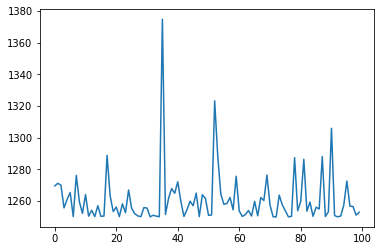

In [187]:
loss_ =[]
for v in history1:
    loss_.append(v['val_loss'])
    
plt.plot(loss_)


# make prediction

In [169]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [173]:
input, target = val_ds[80]
predict_single(input, target, model)

Input: tensor([2.3000e+01, 2.0060e+03, 1.0000e+00, 3.9400e+02, 5.8000e+01, 5.2200e+00,
        9.6250e-01, 8.1000e+01, 1.9600e+02, 2.3800e+01, 9.1000e+01, 7.8000e+01,
        4.6900e+00, 8.1000e+01, 7.2000e+00, 1.2989e+01, 1.7900e+07, 6.7000e+00,
        6.8000e+00, 4.5600e-01, 8.2000e+00])
Target: tensor([53.3000])
Prediction: tensor([73.4062])
